Packages Required

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\Sathvikaa Sri Kumar\Downloads\supply chain analysis.csv")
df.head()

,ShipmentID,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,Status,DeliveryDate
0,SHP2000,Gadget D,51,43.98,Supplier Y,Warehouse 3,2023-05-04,Truck,New York,Delayed,2023-05-08
1,SHP2001,Device E,25,58.46,Supplier Y,Warehouse 1,2023-11-21,Air,Houston,Delayed,2023-12-02
2,SHP2002,Widget A,74,68.71,Supplier Y,Warehouse 3,2023-09-28,Ship,New York,In Transit,2023-10-11
3,SHP2003,Widget B,35,42.51,Supplier X,Warehouse 1,2023-07-11,Truck,Phoenix,Delivered,2023-07-14
4,SHP2004,Gadget D,121,61.39,Supplier Z,Warehouse 1,2023-01-22,Air,Chicago,In Transit,2023-02-04


1.Data Cleaning

In [ ]:
1.1 ➢ Identify and remove duplicate rows (if any)

In [3]:
df.drop_duplicates(inplace=True)


In [ ]:
1.2 ➢ Check for missing values and handle them appropriately

In [6]:
print(df.isnull().sum())

ShipmentID       0
Product          0
Quantity         0
UnitCost         0
Supplier         0
Warehouse        0
ShipmentDate     0
TransportMode    0
Destination      0
Status           0
DeliveryDate     0
dtype: int64


1.3 ➢ Convert the ShipmentDate and DeliveryDate to datetime format.

In [7]:
df['ShipmentDate'] = pd.to_datetime(df['ShipmentDate'])
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'])
df.head()


,ShipmentID,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,Status,DeliveryDate
0,SHP2000,Gadget D,51,43.98,Supplier Y,Warehouse 3,2023-05-04,Truck,New York,Delayed,2023-05-08
1,SHP2001,Device E,25,58.46,Supplier Y,Warehouse 1,2023-11-21,Air,Houston,Delayed,2023-12-02
2,SHP2002,Widget A,74,68.71,Supplier Y,Warehouse 3,2023-09-28,Ship,New York,In Transit,2023-10-11
3,SHP2003,Widget B,35,42.51,Supplier X,Warehouse 1,2023-07-11,Truck,Phoenix,Delivered,2023-07-14
4,SHP2004,Gadget D,121,61.39,Supplier Z,Warehouse 1,2023-01-22,Air,Chicago,In Transit,2023-02-04


1.4 ➢ Create a new column: DeliveryTime = DeliveryDate - ShipmentDate.

In [8]:
df['DeliveryTime'] = df['DeliveryDate'] - df['ShipmentDate']
df.head()

,ShipmentID,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,Status,DeliveryDate,DeliveryTime
0,SHP2000,Gadget D,51,43.98,Supplier Y,Warehouse 3,2023-05-04,Truck,New York,Delayed,2023-05-08,4 days
1,SHP2001,Device E,25,58.46,Supplier Y,Warehouse 1,2023-11-21,Air,Houston,Delayed,2023-12-02,11 days
2,SHP2002,Widget A,74,68.71,Supplier Y,Warehouse 3,2023-09-28,Ship,New York,In Transit,2023-10-11,13 days
3,SHP2003,Widget B,35,42.51,Supplier X,Warehouse 1,2023-07-11,Truck,Phoenix,Delivered,2023-07-14,3 days
4,SHP2004,Gadget D,121,61.39,Supplier Z,Warehouse 1,2023-01-22,Air,Chicago,In Transit,2023-02-04,13 days


2. Shipment Volume Insights

2.1 ➢ Total number of shipments per month

In [9]:
# extracts the month and year from the ShipmentDate column and stores it in a new column called ShipmentMonth.
# we group the data by ShipmentMonth, so shipments are grouped per month:
       # agg({'ShipmentID': 'count'}) counts the number of shipments (ShipmentID) per month.
       # reset_index() ensures the result is converted back into a DataFrame format rather than a grouped object.
# This renames the columns of monthly_shipments:
       #'Shipment per Month' → This column contains the year and month.
       #'No.of Shippments' → This contains the total count of shipments for each month.

df['ShipmentMonth'] = df['ShipmentDate'].dt.to_period('M') 
monthly_shipments = df.groupby('ShipmentMonth').agg({'ShipmentID': 'count'}).reset_index()
monthly_shipments.columns = ['Shipment per Month','No.of Shippments']
monthly_shipments

,Shipment per Month,No.of Shippments
0,2023-01,6
1,2023-02,5
2,2023-03,4
3,2023-04,5
4,2023-05,7
5,2023-06,2
6,2023-07,4
7,2023-08,4
8,2023-09,2
9,2023-10,1


2.2 ➢ Quantity of products shipped by warehouse.

In [10]:
#grouping warehouse columns, so shipments are aggregated per warehouse.
         # Using as_index=False ensures the result remains a regular DataFrame instead of a grouped object.
         #the .agg({'ShipmentID': 'count'}) function counts the number of ShipmentID occurrences per warehouse, effectively calculating the total shipments handled by each warehouse.
warehouse_shipments =df.groupby('Warehouse',as_index = False).agg({'ShipmentID':'count'})
warehouse_shipments

,Warehouse,ShipmentID
0,Warehouse 1,19
1,Warehouse 2,11
2,Warehouse 3,20


2.3 ➢ Top 5 most shipped products.

In [11]:
#grouping product and aggreagating with shipmentID( with total number of count)
#then representing it through columns
#to show top shipped products through we classify them through rank
product_shipment = df.groupby('Product',as_index=False).agg({'ShipmentID':'count'})
product_shipment.columns = ['Product', 'ShipmentCount']
product_shipment['rank'] = product_shipment['ShipmentCount'].rank(method='dense', ascending=False).astype(int)
product_shipment.head(5)

,Product,ShipmentCount,rank
0,Device E,12,2
1,Gadget C,6,5
2,Gadget D,8,4
3,Widget A,10,3
4,Widget B,14,1


3.Revenue Analysis

3.1 ➢ Create Revenue = Quantity × UnitCost.

In [12]:
df['Revenue'] = df['Quantity']*df['UnitCost']
df.head(3)

,ShipmentID,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,Status,DeliveryDate,DeliveryTime,ShipmentMonth,Revenue
0,SHP2000,Gadget D,51,43.98,Supplier Y,Warehouse 3,2023-05-04,Truck,New York,Delayed,2023-05-08,4 days,2023-05,2242.98
1,SHP2001,Device E,25,58.46,Supplier Y,Warehouse 1,2023-11-21,Air,Houston,Delayed,2023-12-02,11 days,2023-11,1461.50
2,SHP2002,Widget A,74,68.71,Supplier Y,Warehouse 3,2023-09-28,Ship,New York,In Transit,2023-10-11,13 days,2023-09,5084.54


3.2 ➢ Analyze Revenue Distribution

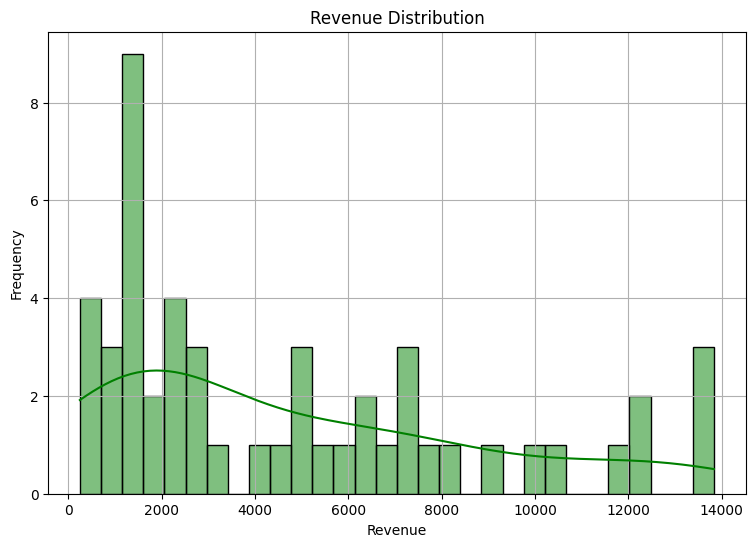

In [13]:
plt.figure(figsize=(9, 6))
sns.histplot(df['Revenue'], bins=30, kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

4.Supplier and Warehouse Analysis

4.1 ➢ Number of shipments per supplier.

In [14]:
df.head(3)

,ShipmentID,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,Status,DeliveryDate,DeliveryTime,ShipmentMonth,Revenue
0,SHP2000,Gadget D,51,43.98,Supplier Y,Warehouse 3,2023-05-04,Truck,New York,Delayed,2023-05-08,4 days,2023-05,2242.98
1,SHP2001,Device E,25,58.46,Supplier Y,Warehouse 1,2023-11-21,Air,Houston,Delayed,2023-12-02,11 days,2023-11,1461.50
2,SHP2002,Widget A,74,68.71,Supplier Y,Warehouse 3,2023-09-28,Ship,New York,In Transit,2023-10-11,13 days,2023-09,5084.54


4.2 ➢ Delivery Time distribution per supplier.

In [15]:
print(df[['Supplier', 'DeliveryTime']].dtypes)

Supplier                 object
DeliveryTime    timedelta64[ns]
dtype: object


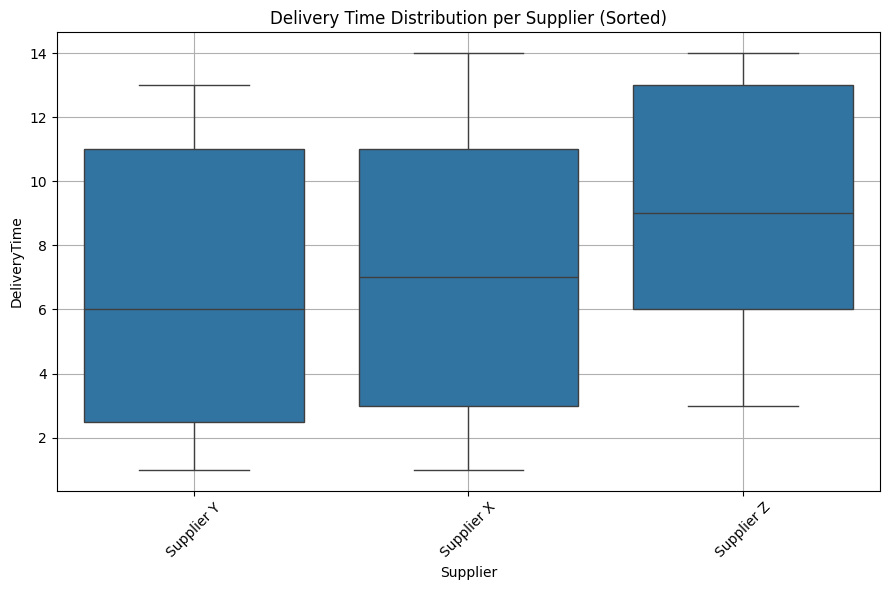

In [43]:
#1. df.groupby('Supplier') : Groups the data by each supplier.So, we get a group for each unique supplier.
#2. ['DeliveryTime'] From each supplier group, we select only the DeliveryTime column.
#3. mean()For each supplier, it calculates the average delivery time.
#4. sort_values()Sorts the suppliers by their average delivery time in ascending order (smallest to largest).
#5. index : Returns just the sorted list of supplier names, without the average values.
supplier_order = df.groupby('Supplier')['DeliveryTime'].mean().sort_values().index

plt.figure(figsize=(9, 6))
sns.boxplot(x='Supplier', y='DeliveryTime', data=df, order=supplier_order)
plt.title('Delivery Time Distribution per Supplier (Sorted)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

5.Delivery & Delay Patterns


In [ ]:
5.1 ➢ Count of each Status category (Delivered, In Transit, Delayed).

In [16]:
count_status = df.groupby('Status',as_index=False).agg({'ShipmentID':'count'})
count_status

,Status,ShipmentID
0,Delayed,16
1,Delivered,18
2,In Transit,16


In [ ]:
5.2 ➢ Average delivery time per transport mode.

In [17]:
average_time = df.groupby('TransportMode',as_index = False).agg({'DeliveryTime':'mean'})
average_time

,TransportMode,DeliveryTime
0,Air,8 days 16:00:00
1,Rail,9 days 09:36:00
2,Ship,6 days 09:13:50.769230769
3,Truck,6 days 00:00:00


6. Time Series Analysis

6.1 ➢ Shipment volume over time (weekly/monthly)

In [21]:
monthly_volume = df.groupby('ShipmentMonth').agg({'ShipmentID': 'count'}).reset_index()
monthly_volume['ShipmentMonth'] = monthly_volume['ShipmentMonth'].astype(str)
monthly_volume

,ShipmentMonth,ShipmentID
0,2023-01,6
1,2023-02,5
2,2023-03,4
3,2023-04,5
4,2023-05,7
5,2023-06,2
6,2023-07,4
7,2023-08,4
8,2023-09,2
9,2023-10,1


Representation

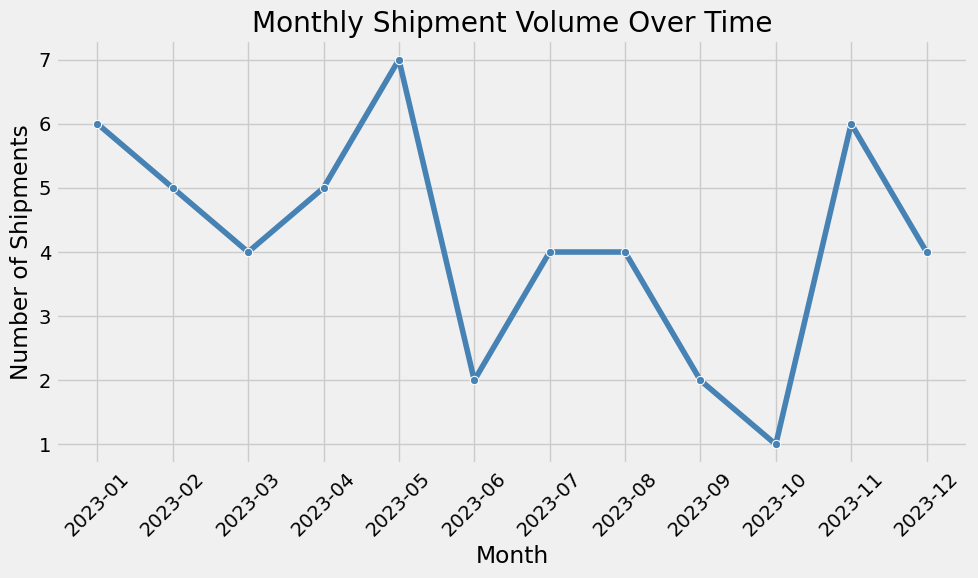

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
sns.lineplot(x='ShipmentMonth', y='ShipmentID', data=monthly_volume, marker='o', color='steelblue')
plt.title('Monthly Shipment Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


6.2 Cost trends over time

In [23]:
monthly_cost = df.groupby('ShipmentMonth').agg({'UnitCost': 'sum'}).reset_index()
monthly_cost['ShipmentMonth'] = monthly_cost['ShipmentMonth'].astype(str)
monthly_cost

,ShipmentMonth,UnitCost
0,2023-01,367.48
1,2023-02,150.64
2,2023-03,236.50
3,2023-04,185.91
4,2023-05,404.39
5,2023-06,101.62
6,2023-07,273.41
7,2023-08,224.85
8,2023-09,121.07
9,2023-10,62.08


Representation

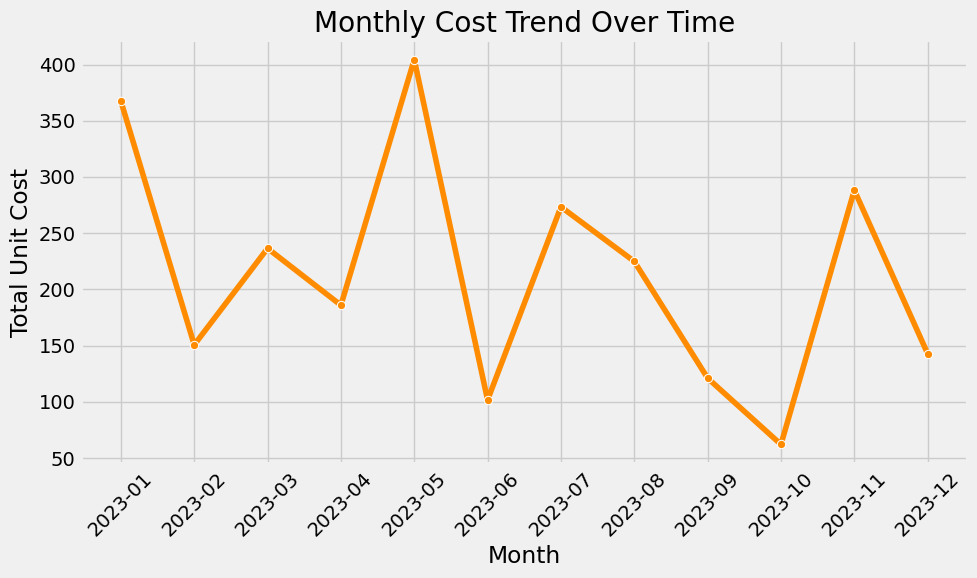

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ShipmentMonth', y='UnitCost', data=monthly_cost, marker='o', color='darkorange')
plt.title('Monthly Cost Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Unit Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


7. Outlier Detection & Treatment

7.1 ➢ Detect and treat outliers in revenue using boxplots.

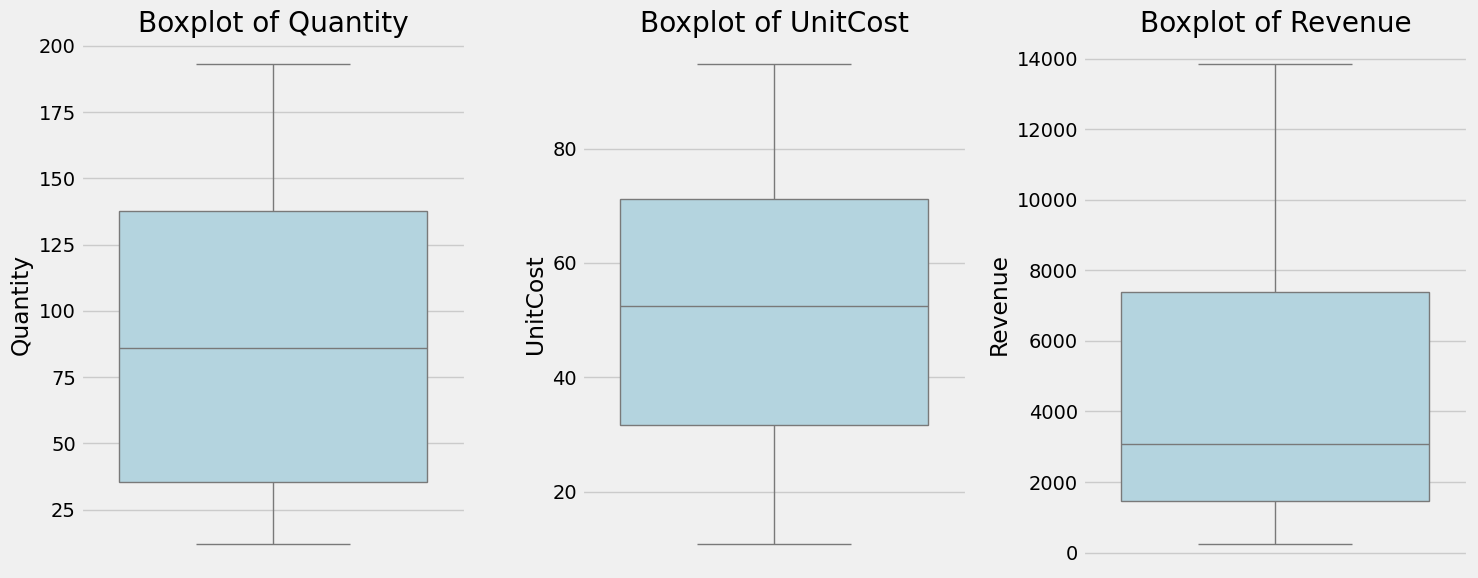

In [25]:
plt.figure(figsize=(15, 6))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [29]:
#As we can see Revenue has outliers
#Finding outliers
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3-Q1
lower_b = Q1 - 1.5* IQR
upper_b = Q3 + 1.5* IQR

df_original = df.copy()

outiler_revenue = df[(df['Revenue']<lower_b) | (df['Revenue']>upper_b)]
outiler_revenue



,ShipmentID,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,Status,DeliveryDate,DeliveryTime,ShipmentMonth,Revenue


8. Visualization Tasks

8.1 Create a Bar Chart for Total Sales Per Destination

In [32]:
sales_per_destination = df.groupby('Destination', as_index=False).agg({'Revenue': 'sum'})
sales_per_destination = sales_per_destination.sort_values(by='Revenue', ascending=False)
sales_per_destination

,Destination,Revenue
1,Houston,81182.45
0,Chicago,56610.28
4,Phoenix,37447.46
2,Los Angeles,32146.72
3,New York,32114.64


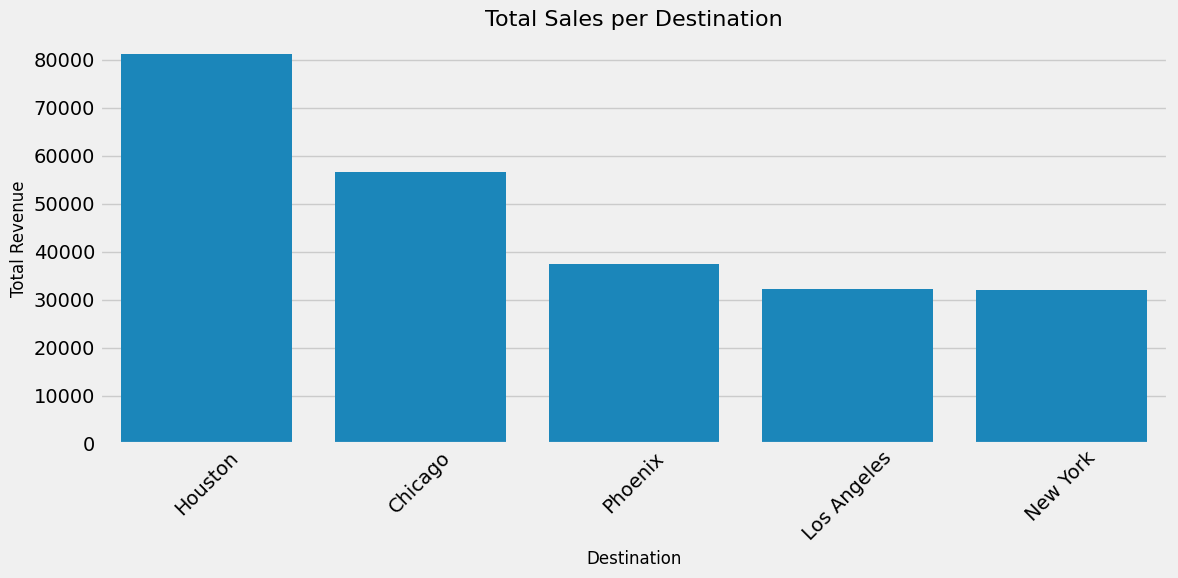

In [34]:
#using above we Create a Bar Chart for Total Sales Per Destination
plt.figure(figsize=(12, 6))
sns.barplot(x='Destination', y='Revenue', data=sales_per_destination)
plt.title('Total Sales per Destination', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8.2 ➢ Generate a Line Chart for Monthly Sales Trends

In [35]:
monthly_sales = df.groupby('ShipmentMonth')['Revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['ShipmentMonth'].astype(str)
monthly_sales

,ShipmentMonth,Revenue,Month
0,2023-01,45431.13,2023-01
1,2023-02,12935.49,2023-02
2,2023-03,13438.75,2023-03
3,2023-04,16465.49,2023-04
4,2023-05,46913.69,2023-05
5,2023-06,16376.98,2023-06
6,2023-07,18203.55,2023-07
7,2023-08,24070.79,2023-08
8,2023-09,8016.70,2023-09
9,2023-10,2172.80,2023-10


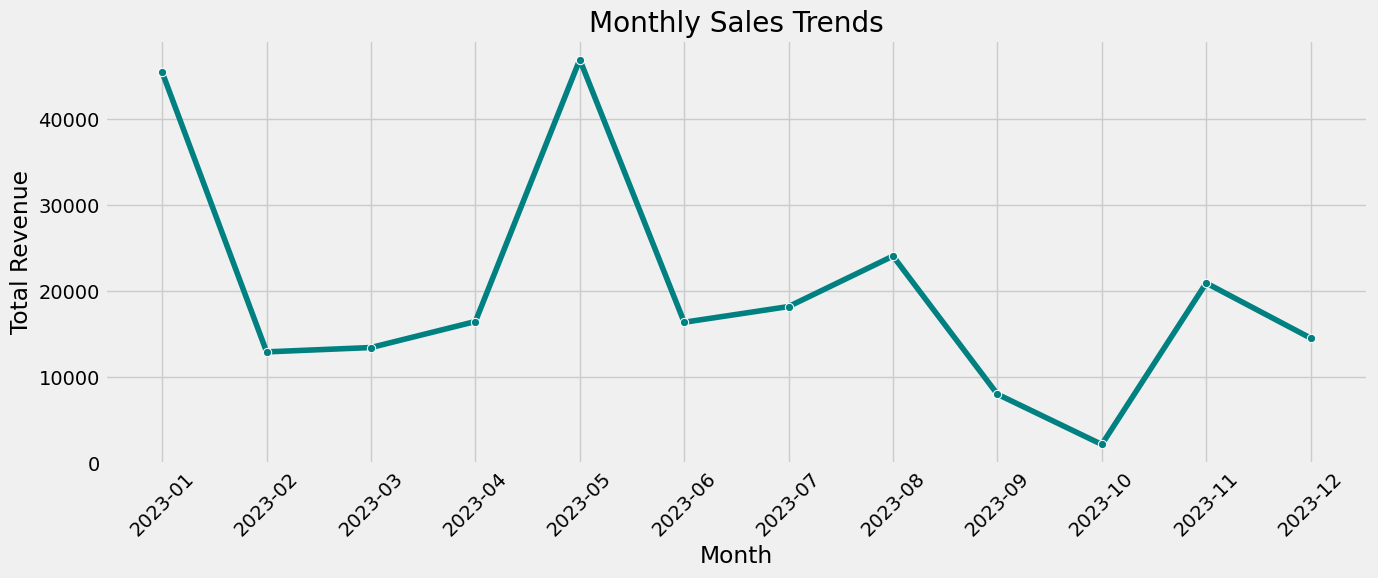

In [36]:
#sing above we Generate a Line Chart for Monthly Sales Trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', marker='o', color='teal')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

9.Data Transformation

9.1 ➢ Remove unnecessary columns

In [37]:
# columns that are not useful for modeling (like IDs, repeated or constant values), you can drop them.
# Drop unnecessary columns (example: 'ShipmentID', 'Status')
df_cleaned = df.drop(columns=['ShipmentID', 'Status'], errors='ignore')

9.2 ➢ Normalize numerical variables using Standard Scaler

In [40]:
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
# Initialize scaler
scaler = StandardScaler()
# Apply standard scaling
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
df_cleaned.head()

,Product,Quantity,UnitCost,Supplier,Warehouse,ShipmentDate,TransportMode,Destination,DeliveryDate,DeliveryTime,ShipmentMonth,Revenue
0,Gadget D,-0.719559,-0.310716,Supplier Y,Warehouse 3,2023-05-04,Truck,New York,2023-05-08,4 days,2023-05,-0.637266
1,Device E,-1.199758,0.314168,Supplier Y,Warehouse 1,2023-11-21,Air,Houston,2023-12-02,11 days,2023-11,-0.832791
2,Widget A,-0.294768,0.756507,Supplier Y,Warehouse 3,2023-09-28,Ship,New York,2023-10-11,13 days,2023-09,0.073685
3,Widget B,-1.015066,-0.374154,Supplier X,Warehouse 1,2023-07-11,Truck,Phoenix,2023-07-14,3 days,2023-07,-0.826198
4,Gadget D,0.573284,0.440613,Supplier Z,Warehouse 1,2023-01-22,Air,Chicago,2023-02-04,13 days,2023-01,0.660061


10.Handling Categorical Features

10.1 ➢ Convert categorical features into numerical format using encoding.

In [42]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols.tolist())
Categorical_columns: ['Product', 'Supplier', 'Warehouse', 'TransportMode', 'Destination']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
df_encoded.head(10)

Categorical columns: ['Product', 'Supplier', 'Warehouse', 'TransportMode', 'Destination']


,Quantity,UnitCost,ShipmentDate,DeliveryDate,DeliveryTime,ShipmentMonth,Revenue,Product_Gadget C,Product_Gadget D,Product_Widget A,...,Supplier_Supplier Z,Warehouse_Warehouse 2,Warehouse_Warehouse 3,TransportMode_Rail,TransportMode_Ship,TransportMode_Truck,Destination_Houston,Destination_Los Angeles,Destination_New York,Destination_Phoenix
0,-0.719559,-0.310716,2023-05-04,2023-05-08,4 days,2023-05,-0.637266,False,True,False,...,False,False,True,False,False,True,False,False,True,False
1,-1.199758,0.314168,2023-11-21,2023-12-02,11 days,2023-11,-0.832791,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.294768,0.756507,2023-09-28,2023-10-11,13 days,2023-09,0.073685,False,False,True,...,False,False,True,False,True,False,False,False,True,False
3,-1.015066,-0.374154,2023-07-11,2023-07-14,3 days,2023-07,-0.826198,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,0.573284,0.440613,2023-01-22,2023-02-04,13 days,2023-01,0.660061,False,True,False,...,True,False,False,False,False,False,False,False,False,False
5,1.016544,0.700406,2023-06-24,2023-06-25,1 days,2023-06,1.247090,False,False,True,...,False,False,False,False,True,False,True,False,False,False
6,-0.996597,-1.286451,2023-05-12,2023-05-13,1 days,2023-05,-1.005973,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7,1.348989,0.903666,2023-12-11,2023-12-25,14 days,2023-12,1.742760,False,False,False,...,False,True,False,False,False,False,False,True,False,False
8,0.443999,0.738814,2023-07-28,2023-08-02,5 days,2023-07,0.749635,False,False,False,...,True,False,True,False,False,True,False,False,False,True
9,-1.070474,-0.402636,2023-02-24,2023-03-07,11 days,2023-02,-0.863390,False,False,False,...,False,False,True,True,False,False,False,False,False,True
